# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading Data


In [2]:
app1=pd.read_csv("googleplaystore.csv")
app1.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


App: Application name

Category: Category to which the app belongs

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

# Data Cleaning

In [4]:
app1.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

<AxesSubplot:>

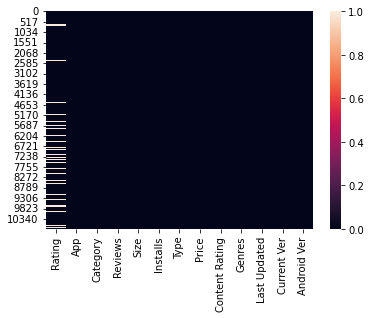

In [5]:
sns.heatmap(app1.isnull())

In [6]:
app1.dropna(inplace=True)
print(app1.shape)

(9360, 13)


<AxesSubplot:>

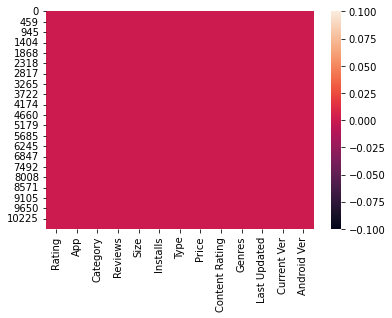

In [7]:
sns.heatmap(app1.isnull())

**Normalising App Size**

In [8]:
app1['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [9]:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x

    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    
    else: 
        return None    

In [10]:
app1.Size=app1.Size.map(change)

In [11]:
app1.Size.value_counts()

14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size, Length: 411, dtype: int64

In [12]:
print(app1.Size.isnull().sum())
app1.Size.fillna(method='pad',inplace=True)
print(app1.Size.isnull().sum())

1637
0


**Converting String Columns To Numeric**

In [13]:
app1.Reviews=app1.Reviews.astype('float')

print(app1.Installs.value_counts()[:5])
app1.Installs=app1.Installs.map(lambda x:x.replace(',','').replace('+',''))
print(app1.Installs.value_counts()[:5])
app1.Installs=app1.Installs.astype('float')

print(app1.Price.value_counts()[:5])
app1.Price=app1.Price.map(lambda x:x.replace('$',''))
print(app1.Price.value_counts()[:5])
app1.Price=app1.Price.astype('float')

print(app1.dtypes)                       

1,000,000+     1576
10,000,000+    1252
100,000+       1150
10,000+        1009
5,000,000+      752
Name: Installs, dtype: int64
1000000     1576
10000000    1252
100000      1150
10000       1009
5000000      752
Name: Installs, dtype: int64
0         8715
$2.99      114
$0.99      106
$4.99       70
$1.99       59
Name: Price, dtype: int64
0        8715
2.99      114
0.99      106
4.99       70
1.99       59
Name: Price, dtype: int64
Rating            float64
App                object
Category           object
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [14]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9360 non-null   float64
 1   App             9360 non-null   object 
 2   Category        9360 non-null   object 
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1023.8+ KB


* Average rating should be between 1 and 5 as only these values are allowed on the play store. Dropping the rows that have a value outside this range.
 
* Reviews should not be more than installs as only those who installed can review the app. If there are any such records, dropping them.

* For free apps (type = “Free”), the price should not be >0. Dropping any such rows.

In [15]:
print(len(app1[app1.Rating>5]))
print(len(app1[app1.Reviews>app1.Installs]))
print(len(app1[(app1.Type=='free')&(app1.Price>0)]))

app1=app1[app1.Reviews<app1.Installs].copy();print(app1.shape)

print(len(app1[app1.Price>200]))
app1=app1[app1.Price<200].copy();print(app1.shape)

print(len(app1[app1.Reviews>=2000000]))
app1=app1[app1.Reviews<=2000000].copy();print(app1.shape)

print(app1.Installs.quantile([.25,.50,.75,.90,.99]))
print(len(app1[app1.Installs>= 10000000]))
app1=app1[app1.Installs<=10000000].copy();print(app1.shape)

0
7
0
(9351, 13)
15
(9336, 13)
453
(8883, 13)
0.25        10000.0
0.50       500000.0
0.75      5000000.0
0.90     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64
1627
(8494, 13)


# Outlier Correction

It seems from the histogram(below) the variables has some skewness and from boxplot it is evident that it has outliers too...Lets correct it by applying log 

[[<AxesSubplot:title={'center':'Rating'}>
  <AxesSubplot:title={'center':'Reviews'}>]
 [<AxesSubplot:title={'center':'Size'}>
  <AxesSubplot:title={'center':'Installs'}>]
 [<AxesSubplot:title={'center':'Price'}> <AxesSubplot:>]]


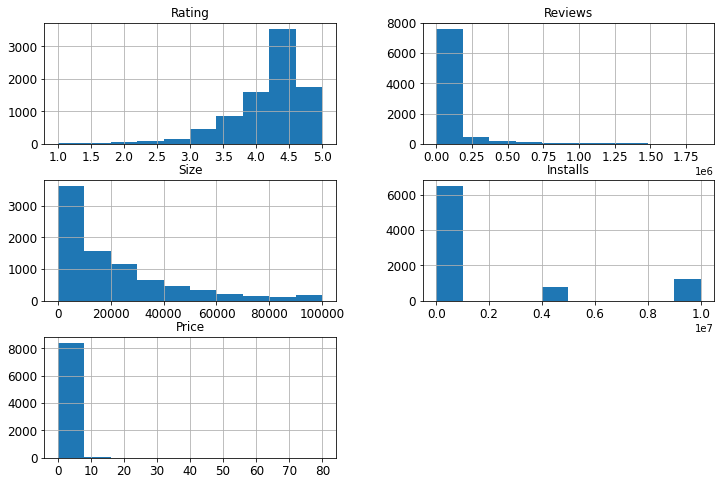

In [16]:
print(app1.hist(['Rating','Reviews','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))


<AxesSubplot:>

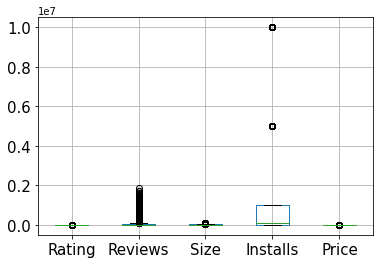

In [17]:
app1.boxplot(fontsize=15)

array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Installs'}>]], dtype=object)

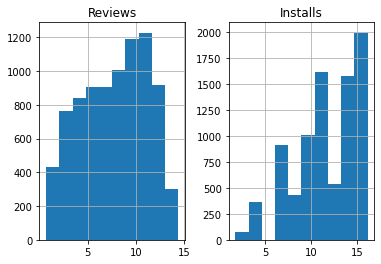

In [18]:
app1.Reviews=app1.Reviews.apply(func=np.log1p)
app1.Installs=app1.Installs.apply(func=np.log1p)

app1.hist(column=['Reviews','Installs'])

# EDA (Exploratory Data Analysis)
 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

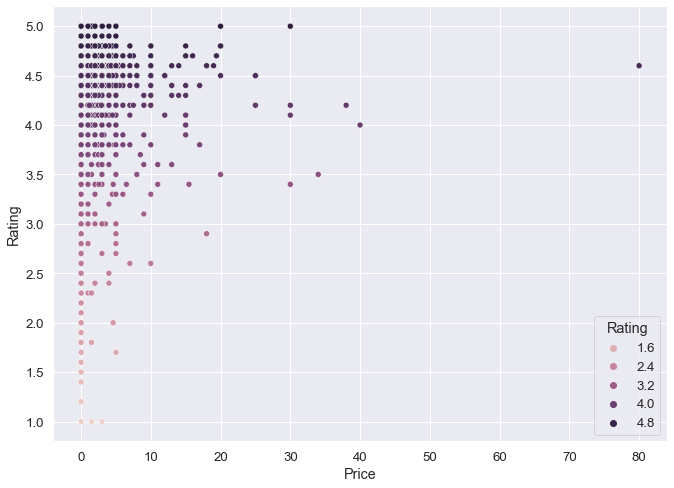

In [19]:
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(app1.Price,app1.Rating,hue=app1.Rating)

plt.show()

While there is not a very clean pattern, it does look that the higher priced apps have better rating. Although, there are not a lot of apps which are high priced, but the pattern is clear.

<AxesSubplot:xlabel='Size', ylabel='Rating'>

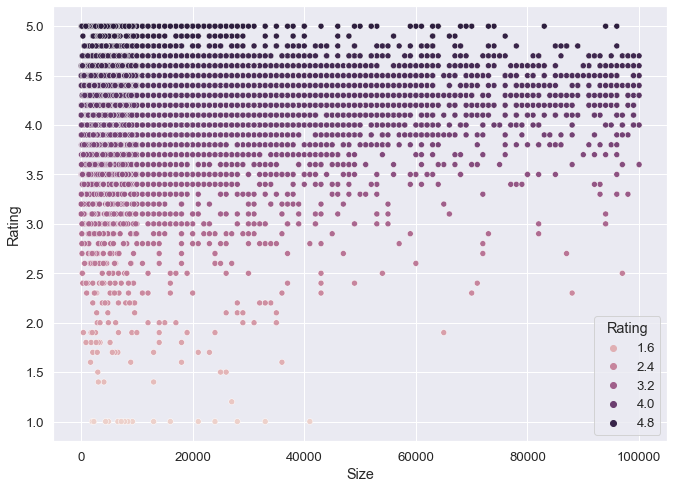

In [20]:
plt.figure(figsize=(11,8))
sns.scatterplot(app1.Size,app1.Rating,hue=app1.Rating)

Again, not a very clean pattern, but it does look like heavier apps are better rated.

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

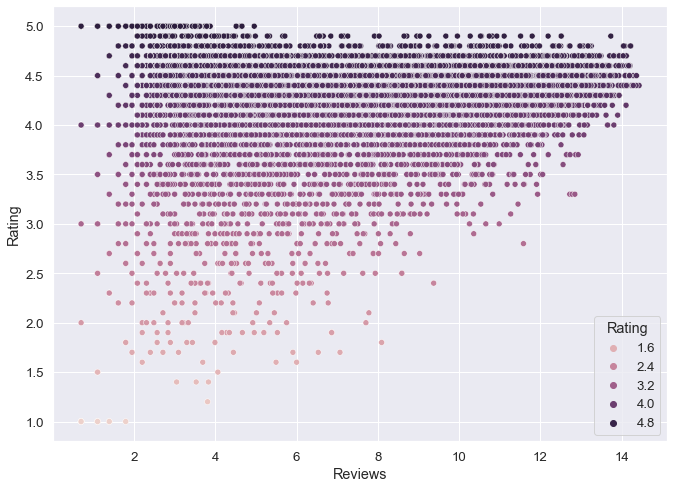

In [21]:
plt.figure(figsize=(11,8))
sns.scatterplot(app1.Reviews,app1.Rating,hue=app1.Rating)

No clear pattern. There are fewer low rated apps among the popular ones (maybe poor ones won’t get so popular), after a certain point, the rating does not depend on the popularity.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

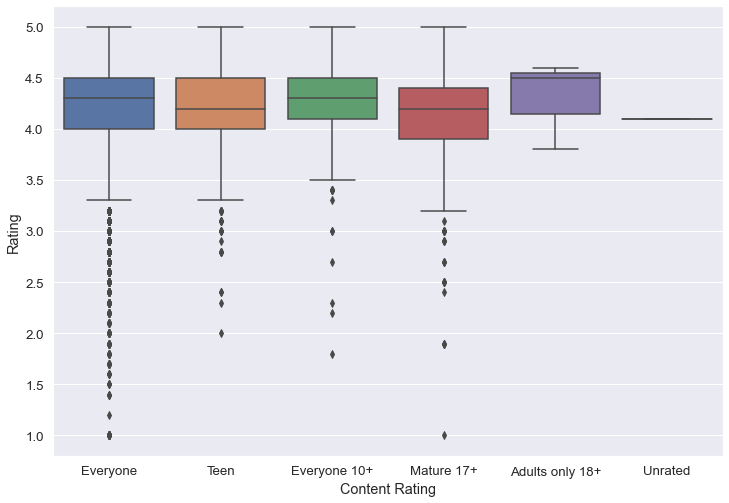

In [22]:
plt.figure(figsize=(12,8.27))
sns.boxplot(app1['Content Rating'],app1.Rating)

While the median rating for most others is similar, the rating for “Adults Only 18+” is the highest.

Text(0, 0.5, 'Rating')

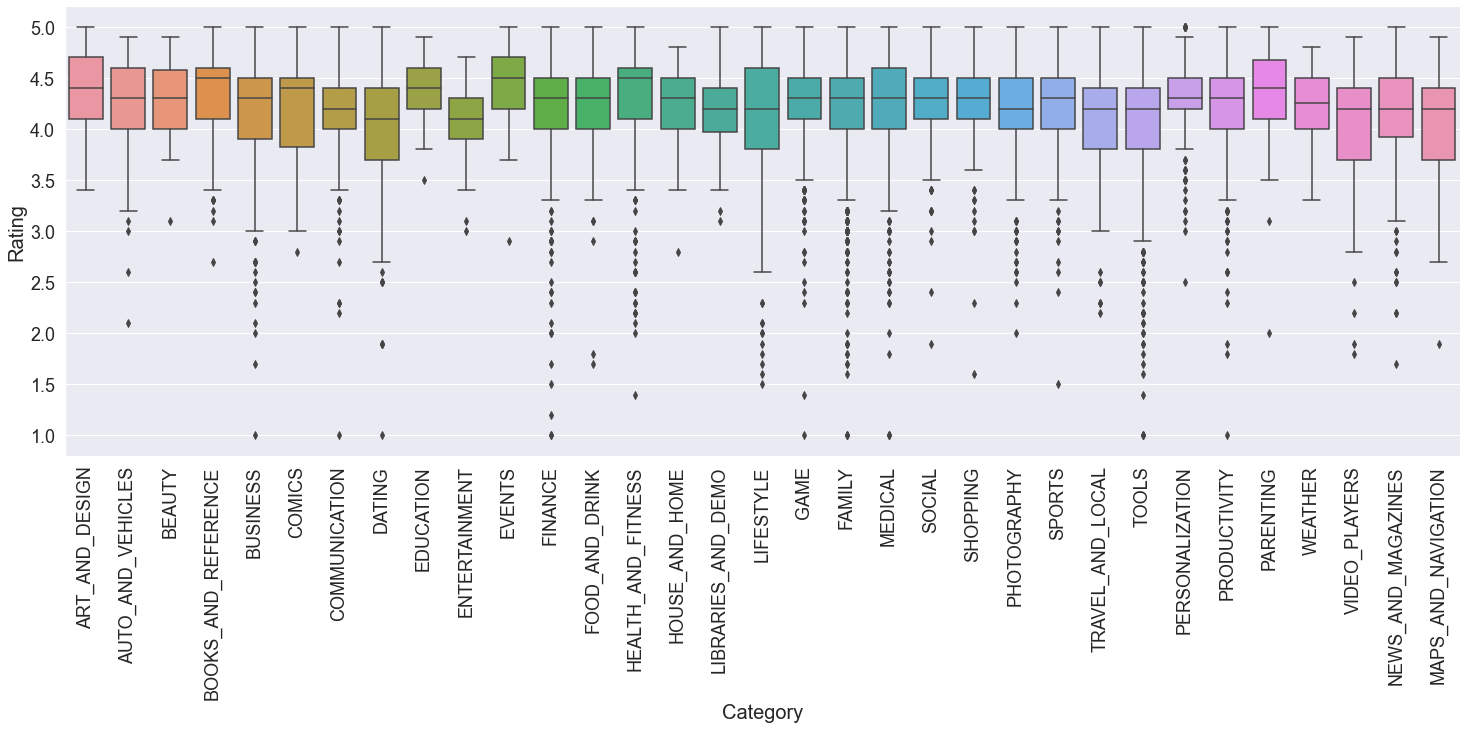

In [23]:
plt.figure(figsize=(25,8.27))
sns.boxplot(app1.Category,app1.Rating)
plt.xticks(fontsize=18,rotation='vertical')
plt.yticks(fontsize=18)
plt.xlabel("Category",fontsize=20)
plt.ylabel("Rating",fontsize=20)

# Deleting Unnecessary Variables & Label Encoding

In [24]:
app1.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,4.4,Paper flowers instructions,ART_AND_DESIGN,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up


In [25]:
app1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)

In [26]:
app1.head()

,Rating,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,4.1,ART_AND_DESIGN,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,3.9,ART_AND_DESIGN,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,4.7,ART_AND_DESIGN,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,4.3,ART_AND_DESIGN,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,4.4,ART_AND_DESIGN,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [27]:
# ;print(app1.shape)
# app1=pd.get_dummies(app1,drop_first=True);print(app1.columns)

<AxesSubplot:>

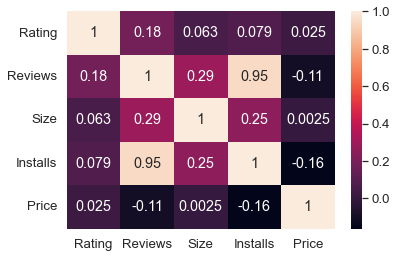

In [28]:
sns.heatmap(app1.corr(), annot=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
app1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [31]:
categoryEncoder = LabelEncoder()
categoryEncoder.fit(app1['Category'])
app1['Encoded Category'] = categoryEncoder.transform(app1['Category'])

In [32]:
categoryEncoder.classes_

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [33]:
app1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [34]:
typeEncoder = LabelEncoder()
typeEncoder.fit(app1['Type'])
app1['Encoded Type'] = typeEncoder.transform(app1['Type'])

In [35]:
app1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [36]:
def updateRating(rating):
    if rating in ['Everyone']:
        return 0
    elif rating in ['Teen', 'Everyone 10+']:
        return 1
    elif rating in ['Mature 17+', 'Adults only 18+']:
        return 2
    else:
        return 3

In [37]:
app1['Encoded Rating'] = app1['Content Rating'].apply(updateRating)

In [38]:
app1['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

Genres has too many values and is a repeat of the Category column, so we will be not be considering it 

In [39]:
app1.head()

,Rating,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Encoded Category,Encoded Type,Encoded Rating
0,4.1,ART_AND_DESIGN,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,0,0,0
1,3.9,ART_AND_DESIGN,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,0,0,0
2,4.7,ART_AND_DESIGN,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,0,0,0
4,4.3,ART_AND_DESIGN,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,0,0,0
5,4.4,ART_AND_DESIGN,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,0,0,0


# Linear Regresssion Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as ms

In [41]:
linreg = LinearRegression()

In [42]:
X = app1[['Encoded Category', 'Reviews', 'Size', 'Installs', 'Price', 'Encoded Rating']]
y = app1['Rating']

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

In [44]:
X_train.shape

(5945, 6)

In [45]:
X_train.head()

,Encoded Category,Reviews,Size,Installs,Price,Encoded Rating
3712,31,11.980570,23000.0,15.424949,0.0,0
1776,14,11.349371,71000.0,16.118096,0.0,0
5636,14,7.907652,4000.0,11.512935,0.0,1
9203,4,7.483244,948.0,11.512935,0.0,0
6781,4,2.564949,13000.0,6.216606,0.0,0


## Linear Regression

In [46]:
Model=linreg.fit(X_train, y_train)
predict=linreg.predict(X_test)

y_test=np.array(y_test)
predict=np.array(predict)

a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()})
a.head(10)

,Actual,Predicted
0,4.3,4.128443
1,3.9,3.975189
2,3.1,4.108121
3,4.6,4.458238
4,4.5,4.234284
5,4.5,4.225264
6,4.2,4.328562
7,4.6,4.174751
8,4.1,4.078362
9,4.6,4.543408


# Model Summary

In [47]:
print('Root Mean Squared Error =',np.sqrt(ms(y_test,predict)))

Root Mean Squared Error = 0.5006756140687312


# Saving the Algorithm

In [48]:
import pickle
pickle.dump(linreg, open('Model.pkl', 'wb'))

In [49]:
model = pickle.load(open('Model.pkl', 'rb'))

In [50]:
X_train.head()

,Encoded Category,Reviews,Size,Installs,Price,Encoded Rating
3712,31,11.980570,23000.0,15.424949,0.0,0
1776,14,11.349371,71000.0,16.118096,0.0,0
5636,14,7.907652,4000.0,11.512935,0.0,1
9203,4,7.483244,948.0,11.512935,0.0,0
6781,4,2.564949,13000.0,6.216606,0.0,0


In [51]:
X.columns

Index(['Encoded Category', 'Reviews', 'Size', 'Installs', 'Price',
       'Encoded Rating'],
      dtype='object')

In [52]:
prediction = model.predict([[11, 2.5, 600, 10, 2.99, 4]])
prediction

array([3.30874131])

In [53]:
np.round(prediction, 1)[0]

3.3